<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/CNN_Folder_Classifier_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 CNN Keras – klasyfikacja obrazów z folderów `1/` i `2/`

Ten notebook uczy model CNN do rozpoznawania obrazów pochodzących z dwóch folderów (`1/` i `2/`).

In [1]:
# 📦 Instalacja TensorFlow (jeśli nie masz)
!pip install tensorflow matplotlib

## 📁 Struktura katalogów

Upewnij się, że struktura danych wygląda tak:

```
project_directory/
├── 1/
│   ├── image1.png
│   └── image2.png
└── 2/
    ├── image1.png
    └── image2.png
```

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# 🔧 Parametry
IMG_SIZE = (64, 64)
BATCH_SIZE = 16
EPOCHS = 10

## 📥 Wczytaj dane z katalogów `1/` i `2/`

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='.',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='.',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 10 files belonging to 3 classes.
Using 8 files for training.
Found 10 files belonging to 3 classes.
Using 2 files for validation.


In [5]:
# 🔄 Normalizacja (0–1)
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

## 🧱 Budowa modelu CNN

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# ⚙️ Kompilacja modelu
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 🚀 Trening modelu

In [8]:
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.7124 - val_accuracy: 0.5000 - val_loss: 1.2780
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - accuracy: 0.5000 - loss: 1.2788 - val_accuracy: 0.5000 - val_loss: 0.7024
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.5000 - loss: 0.6975 - val_accuracy: 0.5000 - val_loss: 0.7397
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5000 - loss: 0.7360 - val_accuracy: 0.5000 - val_loss: 0.7062
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5000 - loss: 0.7038 - val_accuracy: 0.5000 - val_loss: 0.6905
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5000 - loss: 0.6886 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6250 - loss: 0.6866 - val_accuracy: 0.5000 - val_loss: 0.6862
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5000 - loss: 0.6831 - val_accuracy: 0.5000 - val_loss: 0.

## 📊 Wyniki i wizualizacja

In [9]:
loss, acc = model.evaluate(val_ds)
print(f"\n✅ Dokładność na danych walidacyjnych: {acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.6664

✅ Dokładność na danych walidacyjnych: 100.00%


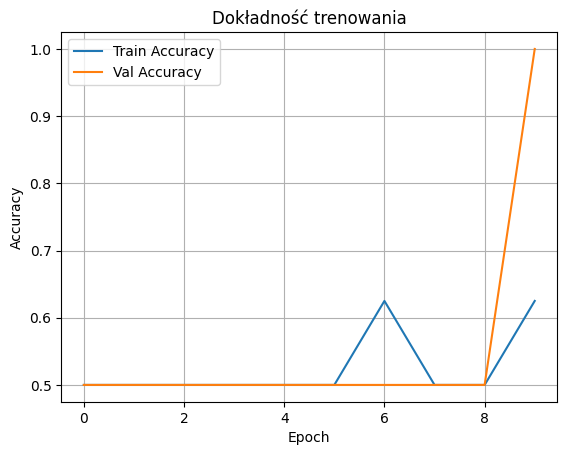

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dokładność trenowania')
plt.legend()
plt.grid(True)
plt.show()